In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('./Data/powerconsumption.csv')

In [4]:
data['Datetime'] = pd.to_datetime(data['Datetime'])
data['Hour'] = data['Datetime'].dt.hour
data['DayOfWeek'] = data['Datetime'].dt.dayofweek
data['Month'] = data['Datetime'].dt.month

In [6]:
data.drop(columns=['Datetime'], inplace=True)

In [7]:
X = data[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'Hour', 'DayOfWeek', 'Month']]
y = data['PowerConsumption_Zone1']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test_scaled)

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [13]:
print("Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Model Performance on Test Set:
Mean Absolute Error (MAE): 3345.140537104051
Mean Squared Error (MSE): 17758396.13786405
Root Mean Squared Error (RMSE): 4214.071207023447
R-squared (R2): 0.6483094973134027


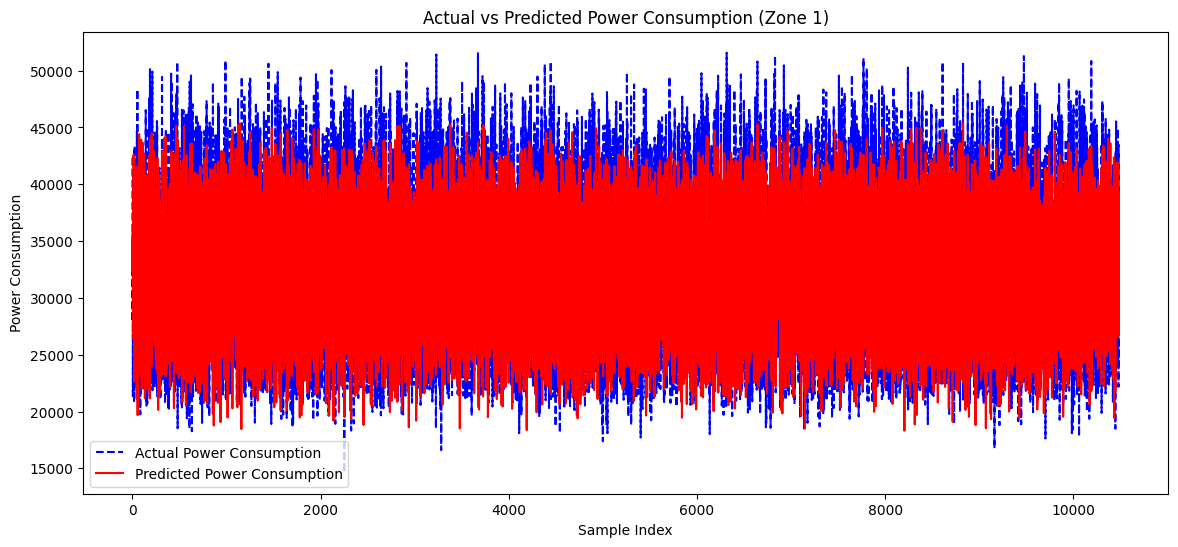

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label="Actual Power Consumption", color='blue', linestyle='--')
plt.plot(y_pred, label="Predicted Power Consumption", color='red')
plt.legend()
plt.title("Actual vs Predicted Power Consumption (Zone 1)")
plt.xlabel("Sample Index")
plt.ylabel("Power Consumption")
plt.show()


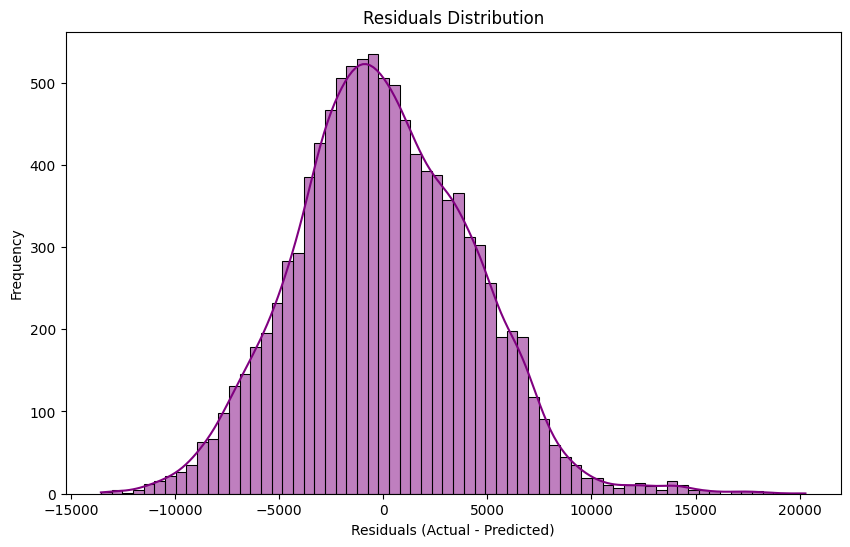

In [16]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()




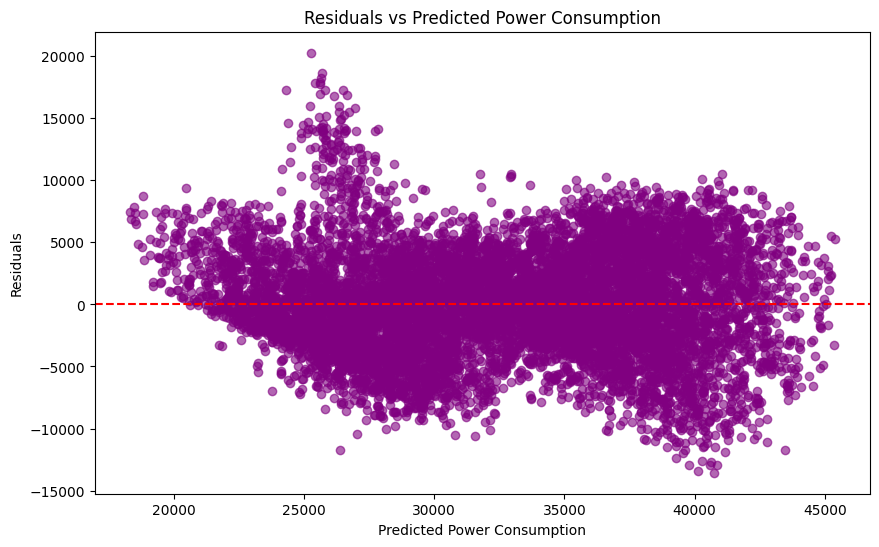

In [17]:
# Scatter Plot of Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Power Consumption")
plt.xlabel("Predicted Power Consumption")
plt.ylabel("Residuals")
plt.show()

In [18]:
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validation R2 scores:", cv_scores)
print("Mean cross-validation R2 score:", np.mean(cv_scores))

Cross-validation R2 scores: [0.64136211 0.64101486 0.64872784 0.63843557 0.64473576]
Mean cross-validation R2 score: 0.6428552295623994
